## Tensorflow Datasets
**Background of Tensorflow Datasets(TFDS)** 

Public datasets are a vital resource for accelerating machine learning research.
However, writing custom scripts to fetch and prepare each dataset individually is tedious and inefficient. 
TFDS handles the laborious tasks of sourcing the data and standardizing it into a consistent format on your storage. 
Furthermore, TensorFlow Datasets utilizes the tf.data API to construct high-performance input pipelines,
compatible with TensorFlow 2.0 and seamlessly usable with tf.keras models.

## Overview

What is TFDS? -- TFDS is a set of ready to use datasets for various different learning tasks, including:

- Computer vison datasets

- Natural language processing datasets

- Miscellaneous other datasets for perforing Usupervised Learning, Reinforcement learning, and more.

The entire list of available datasets can be found [here](https://www.tensorflow.org/datasets/catalog/overview). 

All of these datasets are exposed under the `tensorflow.data.Datasets` module.



**Install TFDS:** `pip install tfds-nightly` (pre-installed in Google Colab)


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

**List all the available datasets in TFDS**

In [2]:
tfds.list_builders()


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

**Load TFDS dataset** <br>
**The easiest way of loading a dataset is** `tfds.load.` **It will:**

1. Download the data, then save it as tfrecord files.
2. Load the tfrecord, then create the tf.data.Dataset.


In [3]:

(training_data, test_data), info = tfds.load('mnist', with_info=True, shuffle_files=True, as_supervised=True, split=['train', 'test'])


- First argument to 'load' is name of dataset.<br>
- param' split' controls which split we wish to load (e.g. train, test or validation).<br>
- param 'shuffle_files' controls wether or not data is shuffled between each epoch.<br>
- param 'data_dir' controls where the dataset is saved (defaults to ~/tensorflow_datasets/).<br>
- param 'with_info' controls wether or not the metadata for the dataset is included.<br>
- param 'as_supervised' controls wether or not an (features, label) tuple is returned (as opposed to just features).<br>
- param 'download' controls wether or not the library will attempt to download the dataset.<br>


Here, we will download and load the  training split of the mnist dataset with info:

**Access the dataset metadata:**

In [4]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\L\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


Features metadata (label names, image shape,...):

In [5]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

Number of classes, label names:

In [6]:
print(info.features["label"].num_classes)
print(info.features["label"].names)

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Shapes, dtypes of the Metadata:

In [7]:
print(info.features.shape)
print(info.features.np_dtype)
print(info.features['image'].shape)
print(info.features['image'].np_dtype)


{'image': (28, 28, 1), 'label': ()}
{'image': <class 'numpy.uint8'>, 'label': <class 'numpy.int64'>}
(28, 28, 1)
<class 'numpy.uint8'>


**Slicing API for more customized dataset split.**<Br>
**Examples:**

In [8]:
# Fashion Mnist dataset, Get 25% to 75% of train dataset 
ds = tfds.load('fashion_mnist', split='train[25%:75%]')

In [9]:
# Get first 4000 of train data for training
ds = tfds.load('fashion_mnist', split='train[:4000]')

In [10]:
# Get 25% of training and all of the test data
ds = tfds.load('fashion_mnist', split='train[:25%]+test')

**Cross Validation:**


In [11]:
vals_ds = tfds.load('fashion_mnist', split=[
    f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)
])
trains_ds = tfds.load('fashion_mnist', split=[
    f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)
])


In [12]:
# First fold of validation DS
vals_ds_fold1 =vals_ds[0]


**To iterate over the dataset in batches:**

In [13]:

batch_size = 32

for epoch in range(2):
    print(f'epoch {epoch}')
    for img, label in training_data.batch(batch_size):
        # notice that img.shape[0] == batch_size
        print(f'img: {img.shape}, labels: {label}') 
        # train model
        pass


epoch 0
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [0 9 4 9 0 6 8 4 7 2 6 0 3 1 1 7 2 4 4 6 5 1 9 3 2 4 3 4 4 7 5 8]
img: (32, 28, 28, 1), labels: [1 1 4 1 5 3 5 8 4 1 1 4 5 3 2 4 1 4 8 1 2 1 9 0 7 6 7 4 4 9 7 5]
img: (32, 28, 28, 1), labels: [6 8 4 6 9 2 9 4 4 9 5 4 5 7 7 1 8 3 7 9 8 4 9 2 8 0 3 9 4 7 6 6]
img: (32, 28, 28, 1), labels: [1 4 0 2 9 1 7 7 4 1 8 5 0 5 0 9 6 3 8 9 9 7 3 1 2 2 7 8 6 4 0 6]
img: (32, 28, 28, 1), labels: [2 4 2 4 8 9 8 5 9 8 4 7 6 9 3 9 9 8 9 4 1 1 8 5 9 9 2 3 8 7 1 4]
img: (32, 28, 28, 1), labels: [2 2 4 8 6 1 4 2 0 5 1 1 8 5 6 6 0 8 1 5 9 2 2 2 0 4 5 9 8 3 2 0]
img: (32, 28, 28, 1), labels: [2 9 4 4 9 5 9 9 2 5 9 6 0 9 1 8 6 9 8 1 5 8 6 7 5 1 4 7 5 6 6 4]
img: (32, 28, 28, 1), labels: [3 1 5 6 0 3 1 8 9 8 9 9 0 8 2 3 2 7 5 4 9 2 0 0 6 6 3 4 2 2 3 6]
img: (32, 28, 28, 1), labels: [8 5 5 5 6 2 7 9 3 7 6 1 2 1 1 4 4 9 3 1 3 9 8 4 1 7 0 5 0 0 9 8]
img: (32, 28, 28, 1), labels: [5

## Visualization ##

Method1:  **`tf.data.Dataset` objects can be converted to pandas.DataFrame with tfds.as_dataframe to be visualized on Jupyter Notebook.**

In [14]:
# list 4 images and labels from mnist dataset
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)


,image,label
0,,4
1,,1
2,,0
3,,7


In [15]:
# list 5 images and labels from fashion_mnist dataset
tfds.as_dataframe(vals_ds_fold1.take(5), info)


,image,label
0,,2
1,,1
2,,8
3,,4
4,,1


Method 2: 
**`tfds.show_examples` returns a matplotlib.figure.Figure (only image datasets supported now):**

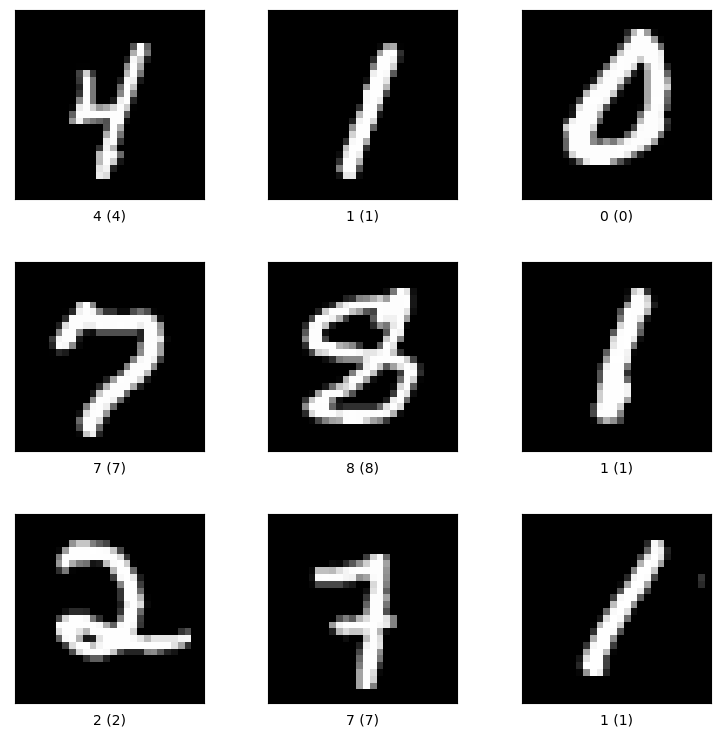

In [16]:
import matplotlib.pyplot as plt

ds, info = tfds.load('mnist', split='train', with_info=True, shuffle_files=True)

fig = tfds.show_examples(ds, info)

**Create your own TFDS**<Br>
`tf.data.Dataset.from_tensor_slices`


In [17]:

np.random.seed(1)

features = np.random.uniform(0,1, size=(32, 100, 100))
labels = np.random.randint(0, 2, size=(32, 1))

dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(5)  

for epoch in range(2):
    for step, (x_batch, y_batch) in enumerate(dataset):
        print(f'step: {step}, x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}')

    print()
        

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)



**Simple Example of ETL pipeline with TFDS in CNN model**

In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds

# MODEL DEFINITION START #
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='Adam', loss='binary_crossentropy', 
              metrics=['accuracy'])
# MODEL DEFINITION END #

# EXTRACT PHASE START #
data = tfds.load('horses_or_humans', split='train', as_supervised=True)
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)
# EXTRACT PHASE END

# TRANSFORM PHASE START #
def augmentimages(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/255)
  image = tf.image.random_flip_left_right(image)
  return image, label

train = data.map(augmentimages)
train_batches = train.shuffle(100).batch(32)
validation_batches = val_data.batch(32)
# TRANSFORM PHASE END

# MODEL TRAINING(LOAD) PHASE START #
history = model.fit(train_batches, epochs=3, 
                    validation_data=validation_batches, validation_steps=1)
# MODEL TRAINING(LOAD) PHASE END #

Epoch 1/3
33/33 [==============================] - 12s 286ms/step - loss: 2.3022 - accuracy: 0.5034 - val_loss: 0.6928 - val_accuracy: 0.5625
Epoch 2/3
33/33 [==============================] - 12s 359ms/step - loss: 0.6932 - accuracy: 0.4869 - val_loss: 0.6928 - val_accuracy: 0.5625
Epoch 3/3
33/33 [==============================] - 12s 352ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5625


**References:**
1. Moroney, L. (n.d.). AI and Machine Learning for Coders. O’Reilly Online Learning. https://www.oreilly.com/library/view/ai-and-machine/9781492078180/ch04.html 
2. Tensorflow datasets. TensorFlow. (n.d.). https://www.tensorflow.org/datasets/overview#iterate_over_a_dataset 